# NGC 338 (UGC 624)

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
name = 'N338'
incl = 64.  #adopted  by  Zasov
scale = 0.292 #kpc/arcsec according to ApJ 142 145(31pp) 2011

data_path = '../../data/ngc338'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [5]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи
* Zasov 2012 https://ui.adsabs.harvard.edu/#abs/2012AstBu..67..362Z/abstract
* https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract (оценки на суммарную массу $\rm{HI}$ и $\rm{H_2}$)
* https://ui.adsabs.harvard.edu/#abs/2011MNRAS.416.2437H/abstract (указание на то, что она взаимодействующая)
* Noordermeer Hulst 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract (фотометрия, декомпозиция)

## Данные

In [6]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+338&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [7]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc338 width=1000 height=350></iframe>')

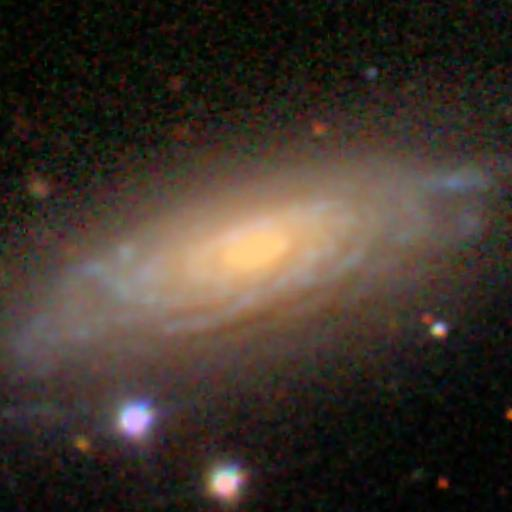

In [8]:
#SDSS
Image('ngc338_SDSS.jpeg', width=300)

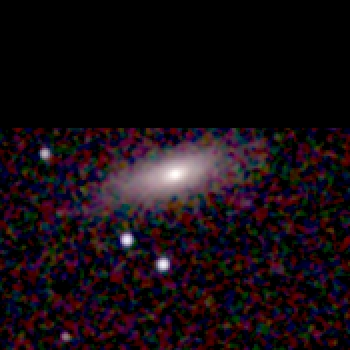

In [9]:
#JHK
Image('ngc338_JHK.jpg', width=300)

### Noordermeer thesis data:

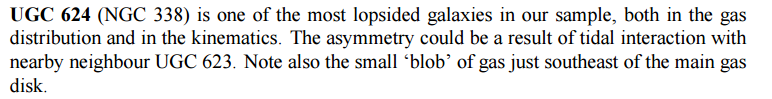

In [10]:
Image('noordermeer_data/n338_cite_p36.png')

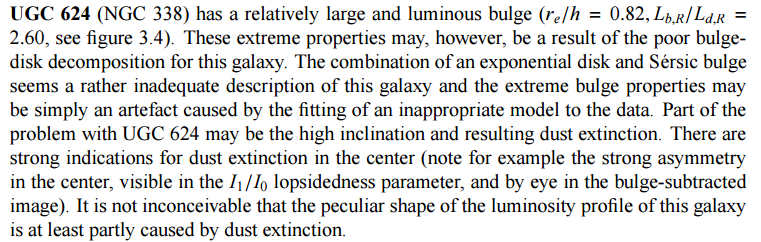

In [11]:
Image('noordermeer_data/n338_cite_p110.png')

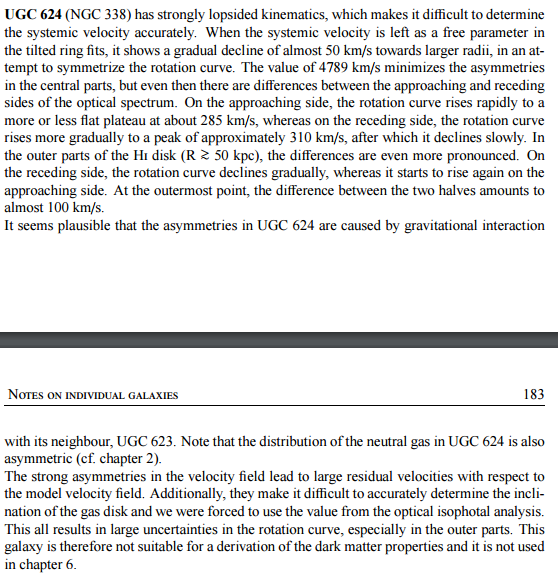

In [12]:
Image('noordermeer_data/n338_cite_pp181_182.png')

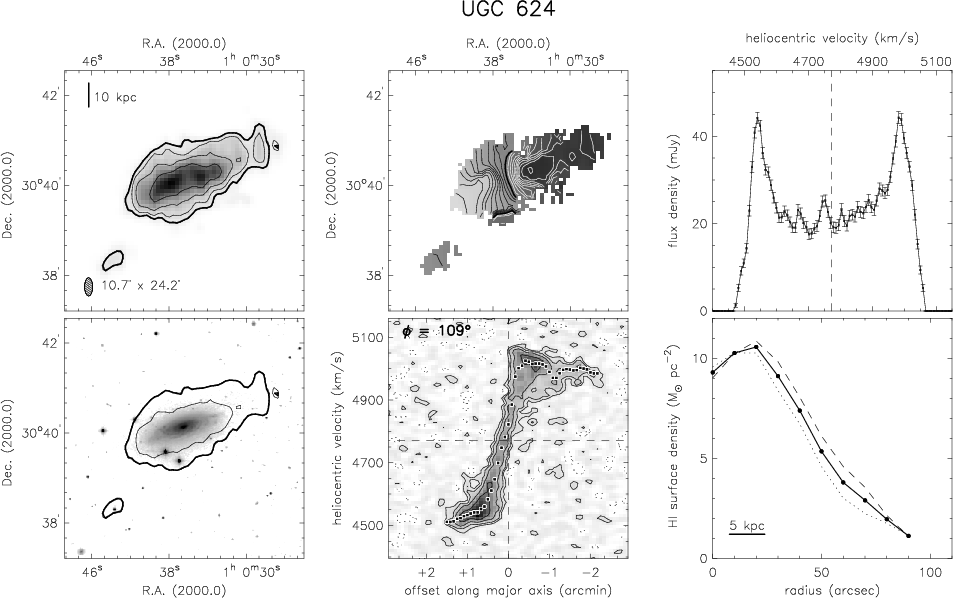

In [13]:
Image('noordermeer_data/HI_data.png')

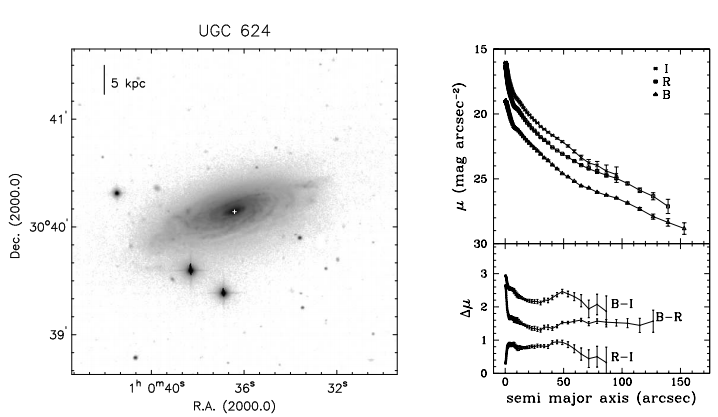

In [14]:
Image('noordermeer_data/n338_photom.png')

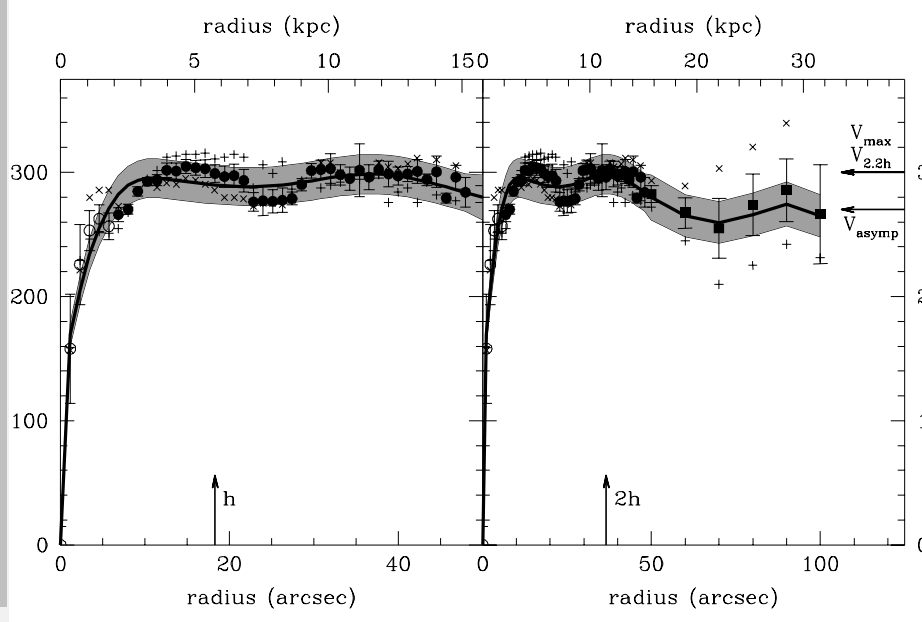

In [15]:
Image('noordermeer_data/n338_rc.png')

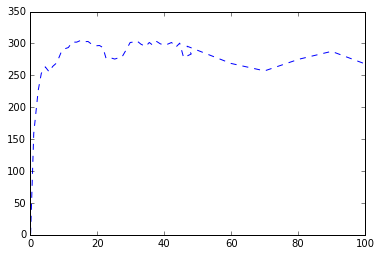

In [16]:
#точки, снятые с предыдущей картинки с помощью WebPlotDigitizer
r_ma, vel_ma = zip(*np.loadtxt("noordermeer_data/n338_rc_noorderm.dat", float, delimiter=','))
plt.plot(r_ma, vel_ma, '--')
# plt.xlim(0, 100)
# plt.ylim(0, 500)
plt.show()

Наконец последнее - все табличные данные из диссертации:

In [17]:
# TODO: добавить

TODO: добавить данные засова

## Кривые вращения

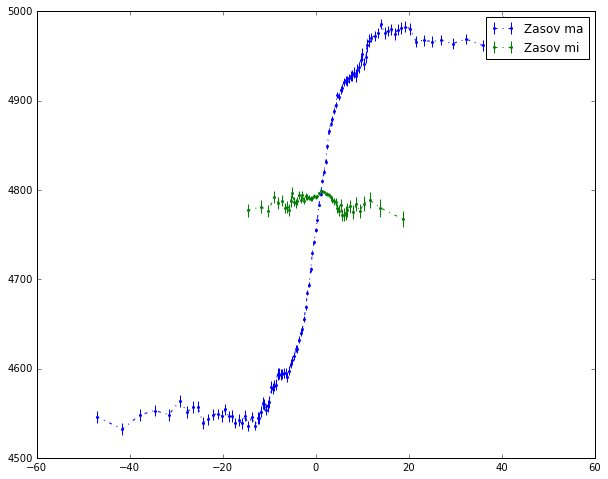

In [18]:
# Данные по звездной кинематике Засова 2012 вдоль большей полуоси, не исправленные за наклон 
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике Засова 2012 вдоль малой полуоси, не исправленные за наклон 
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Zasov ma")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Zasov mi")
plt.legend()
plt.show()

[]

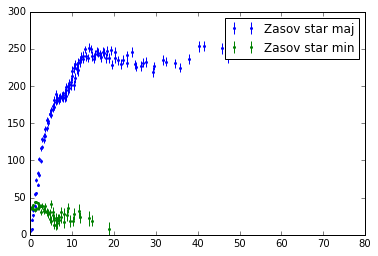

In [19]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

b_vel = 4760

r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, b_vel, incl)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0.0, b_vel, incl)

plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, label = 'Zasov star min', color='green')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend()
plt.plot()

TODO: подумать еще раз про малую полуось

TODO: добавить картинку Засова для сравнения

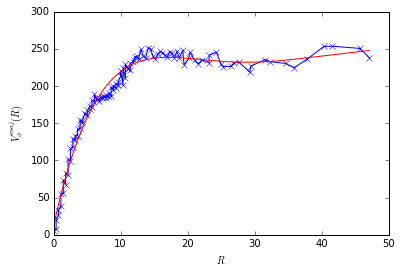

In [20]:
# poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))


plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.show()

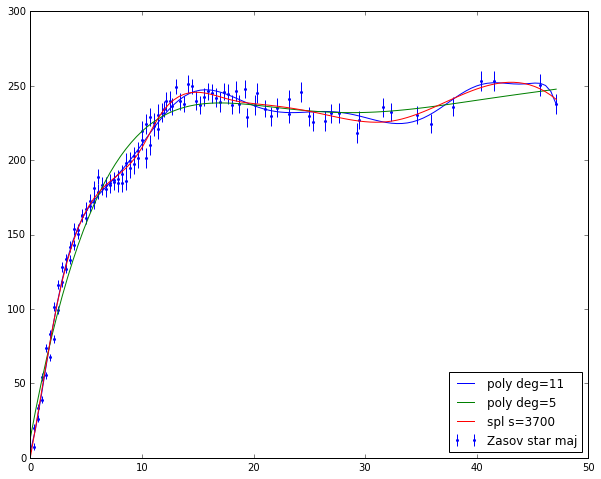

Wall time: 196 ms


In [21]:
%%time
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=11))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=11')

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=5')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter
spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=3700.)
plt.plot(test_points, spl(test_points), '-', label='spl s=3700')

# spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=4000., w=w(e_vel_b))
# plt.plot(test_points, spl(test_points), '-', label='spl s=4000 w^2')

plt.legend(loc='lower right')
# plt.ylim(0, 300)
plt.show()

C весами плохо получается, берем обычный достаточно гладкий сплайн.

In [22]:
star_approx = spl

Газовая кривая, нужна для эпициклического приближения:

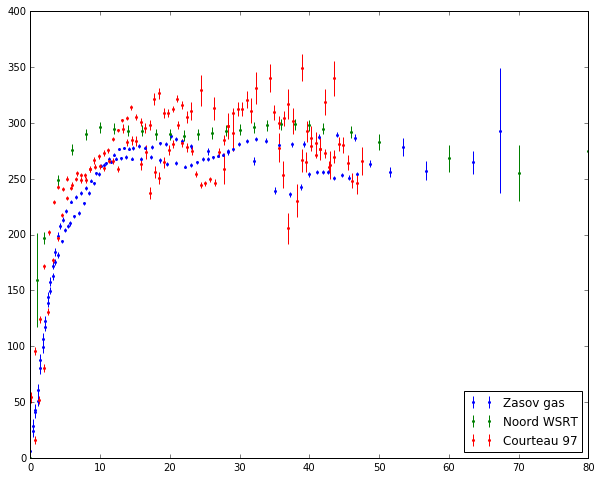

In [23]:
# Данные по кинематике газа Засова 2012 вдоль большой полуоси, не исправленные за наклон (они же Катков)
zasov_raw_data = np.loadtxt("v_gas_ma.dat", float)
r_g, vel_g, e_vel_g = zip(*zasov_raw_data)

# Данные по кинематике газа Noordermeer 2007 (исправлено за наклон)
wsrt_raw_data = np.loadtxt("v_gas_WSRT.dat", float)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*wsrt_raw_data)

# Данные по кинематике газа Courteau 97 (не исправлено за наклон)
court_raw_data = np.loadtxt("v_gas_Court.dat", float)
r_court, vel_court, e_vel_court = zip(*court_raw_data)


r_g_b, vel_g_b, e_vel_g_b = correct_rotation_curve(r_g, vel_g, e_vel_g,  0.0, b_vel, incl)
r_c_b, vel_c_b, e_vel_c_b = correct_rotation_curve(r_court, vel_court, e_vel_court,  0.0, 0.0, incl)


fig = plt.figure(figsize=[10,8])
plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'Noord WSRT')
plt.errorbar(r_c_b, vel_c_b, yerr=e_vel_c_b, fmt='.', marker='.', mew=0, label = 'Courteau 97')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend(loc='lower right')
plt.show()

В целом достаточно неплохо согласуются, если Courteau усреднить

TODO: посмотреть, что именно за газ

Приближения: (пока будем приближать Засова)

TODO: сделать все точки вместе, больше данных чтоб

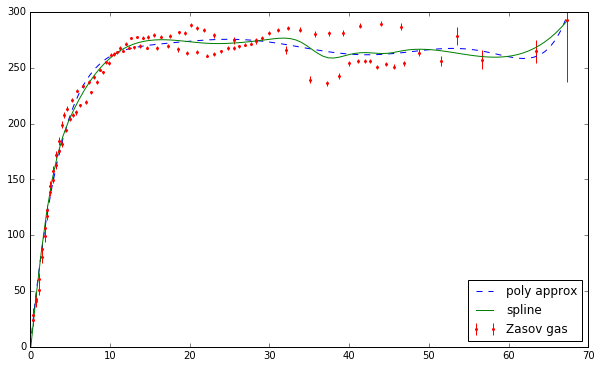

In [24]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_g_b, vel_g_b, deg=7))
test_points = np.linspace(min(r_g_b), max(r_g_b), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_g_b, vel_g_b, k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

## Дисперсии

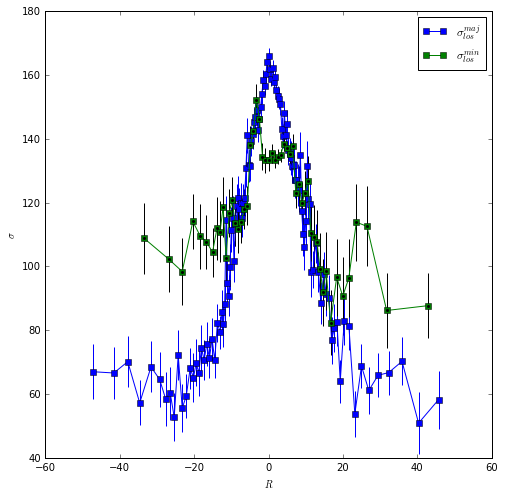

In [25]:
# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_mi_extend = map(correct_min, r_mi)

fig = plt.figure(figsize=[8, 8])
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

In [26]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = zip(r_ma, sig_ma, e_sig_ma)
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
r_sig_ma, sig_ma, e_sig_ma = zip(*sig_maj_data) 

sig_min_data = zip(r_mi_extend, sig_mi, e_sig_mi)
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
r_sig_mi, sig_mi, e_sig_mi = zip(*sig_min_data) 

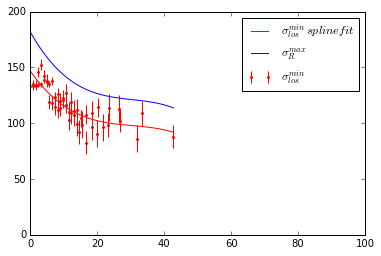

In [27]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=10000.)
sig_R_approx = lambda l: spl_min(l)/sin_i/sin_i

points = np.linspace(0.1, max(r_sig_mi), 100)

plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
plt.plot(points, spl_min(points), label = '$\sigma_{los}^{min}\, splinefit$', color='red')
plt.plot(points, map(sig_R_approx, points), label = '$\sigma_R^{max}$', color='blue')
plt.legend()
plt.ylim(0,200)
plt.xlim(0,100)
plt.show()

## Эпициклическая частота:

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

TODO: использовать $\varkappa$?

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars


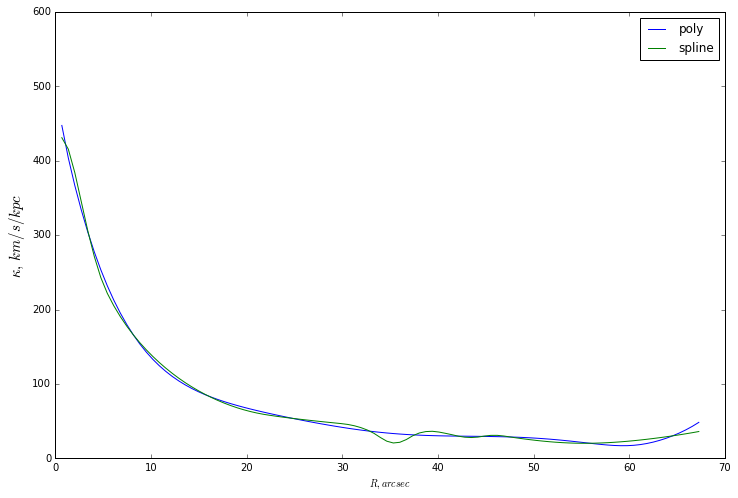

In [28]:
def epicyclicFreq_real(poly_gas, R, resolution):
    '''Честное вычисление эпициклической частоты на расстоянии R.'''
    return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.deriv()(R) / poly_gas(R)) / (R * resolution )

def epicyclicFreq_real_spline(poly_gas, R, resolution):
    '''Честное вычисление эпициклической частоты на расстоянии R для сплайна'''
    return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.derivative()(R) / poly_gas(R)) / (R * resolution )


fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real_spline(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 600)
plt.legend()
plt.show()

## Фотометрия

В дипломе написана неправда - в диссератции есть эта галактика (не знаю, почему я писал только о статье с Hulst), причем аж три полосы: I, R, B.

In [29]:
# from photometry import *

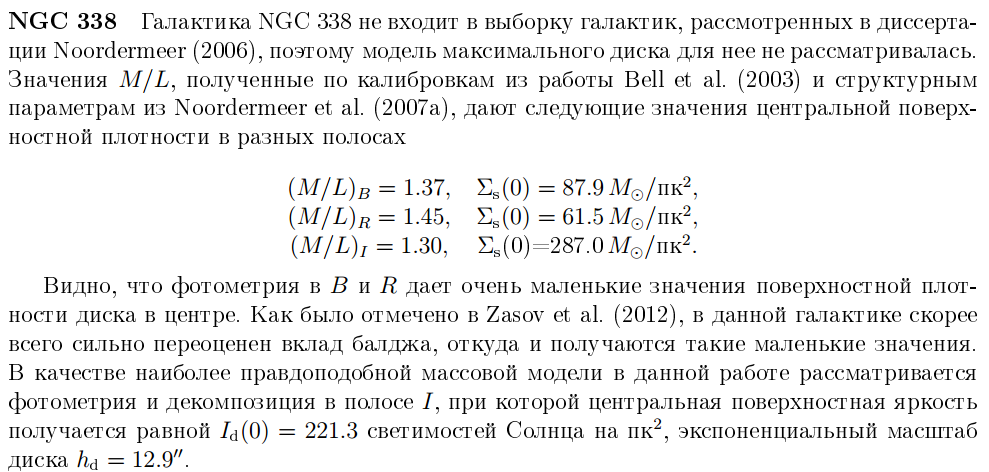

In [30]:
Image('diplom_cite_p34.png')

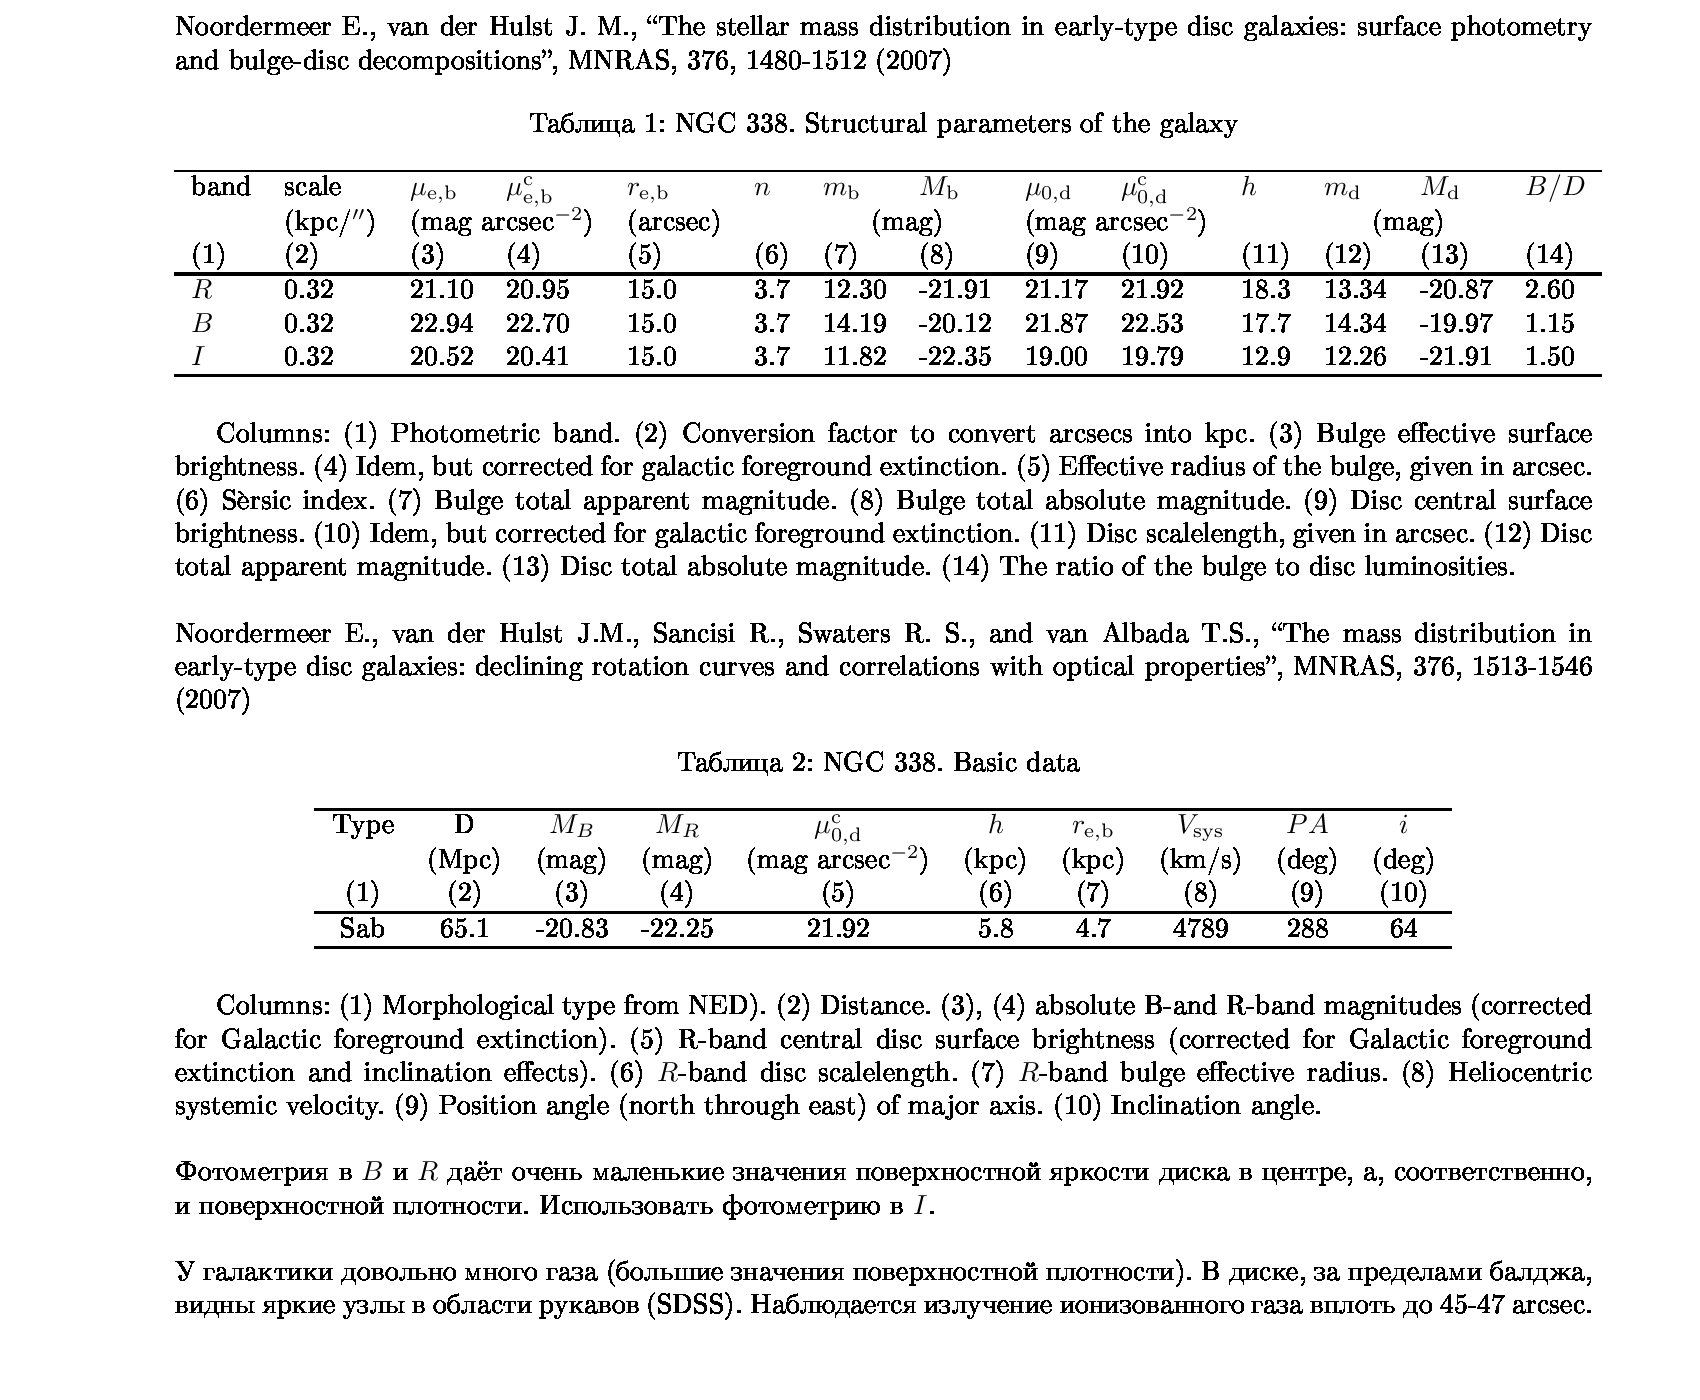

In [31]:
from wand.image import Image as WImage
img = WImage(filename='ngc338.pdf', resolution=200)
img[:, 200:1600]

In [32]:
h_disc = 12.9  # I-band
# TODO: это правда?
M_R = 13.34
M_B = 14.34
mu0_c_I = 19.79 # а это?
r_eff_bulge = 15.0

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [33]:
M_to_L = bell_mass_to_light(M_B - M_R, 'I', 'B-R')
M_to_L

1.297179270983956

In [34]:
surfaceDensityStarI(M_to_L, h_disc, 0.0, mu0_c_I)

287.01167578546597

Получилось больше, чем было в дипломе - надо проверить, правильно ли там считалось.

TODO: проверить диплом (M_to_L - ошибка?)

TODO: проверить формулы

Диск:
$$I_d(r) = I_{0,d}\exp{-\frac{r}{h}}$$ или $$\mu_d(r) = \mu_{0,d} + 1.0857\frac{r}{h}$$
Балдж:
$$I_b(r) = I_e\exp\large[-b_n\large[{(\frac{r}{r_e})}^{\frac{1}{n}}-1 \large] \large]$$ $I_e = I_{0,b}\exp{b_n}$ $$\mu_b(r) = \mu_{e} + 1.0857b_n\large[{(\frac{r}{r_e})}^{\frac{1}{n}}-1 \large]$$

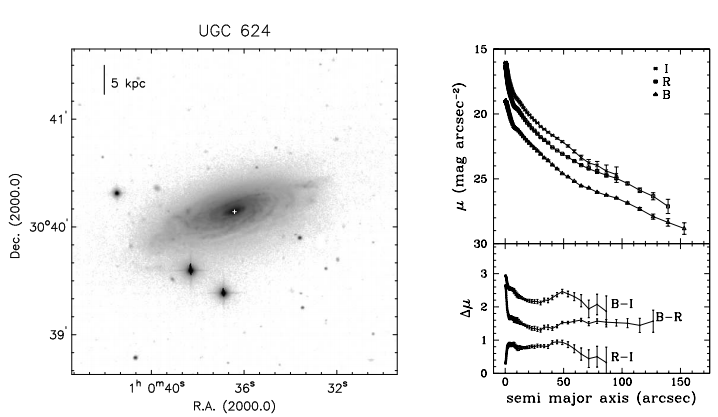

In [35]:
Image('noordermeer_data/n338_photom.png')

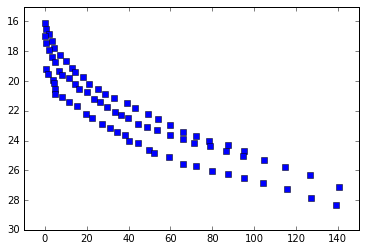

In [36]:
r_phot, mu_phot = zip(*np.loadtxt("noordermeer_data/n338_noord_photoIBR_p131.dat", float, delimiter=','))
plt.plot(r_phot, mu_phot, 's')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.show()

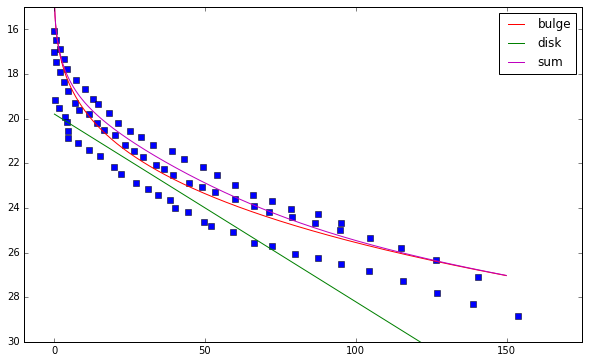

In [37]:
# for I band
mu0b = 20.41 # уточнить это ли число
re = r_eff_bulge
n = 3.7
mu0d = mu0_c_I # и тут тоже
h = h_disc

_ = np.arange(0.1, 150., 0.1)
bulge = [mu_b(l, mu0b, re, n) for l in _]
disk = [mu_d(l, mu0d, h) for l in _]
phprofile = -2.5*np.log10(np.power(10, -np.array(bulge)/2.5)+np.power(10, -np.array(disk)/2.5))

fig = plt.figure(figsize=[10, 6])
plt.plot(r_phot, mu_phot, 's')
plt.plot(_, bulge, '-', label='bulge', color='red')
plt.plot(_, disk, '-', label='disk', color='green')
plt.plot(_, phprofile, '-', label='sum', color='m')
plt.xlim(-10, 175)
plt.ylim(30, 15)
plt.legend()
plt.show()

Плотность HI:

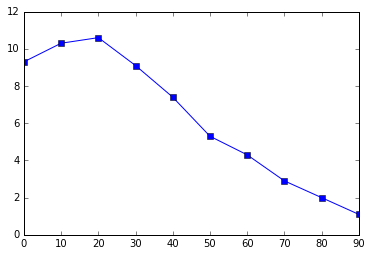

In [38]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-')
plt.show()

Газа оооочень много.

## Неустойчивость

In [39]:
# from instabilities import *

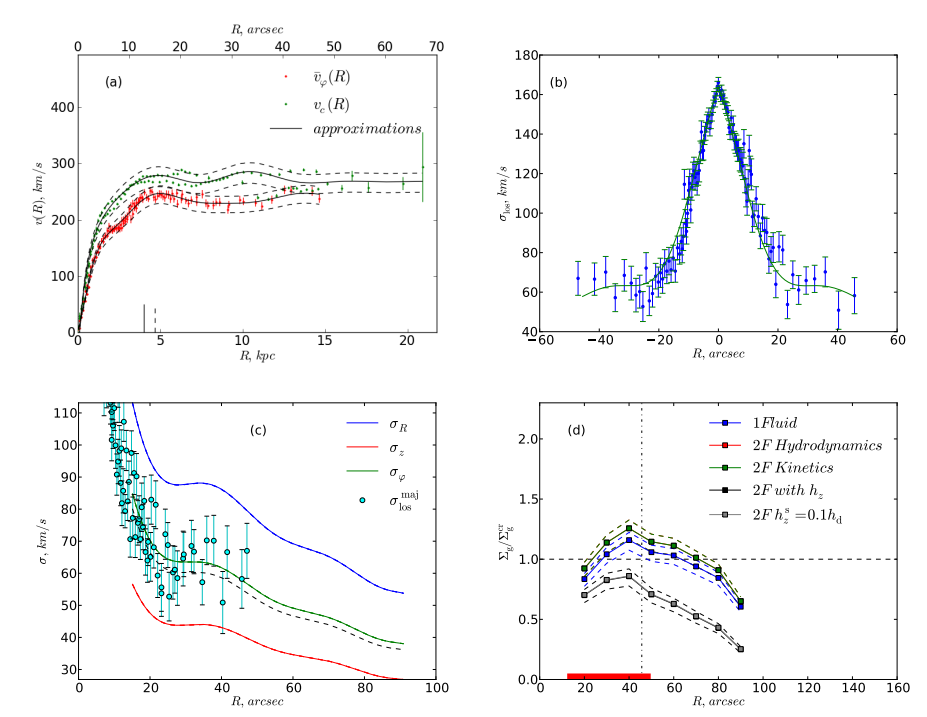

In [40]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [41]:
sound_vel = 6  #скорость звука в газе, км/с

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


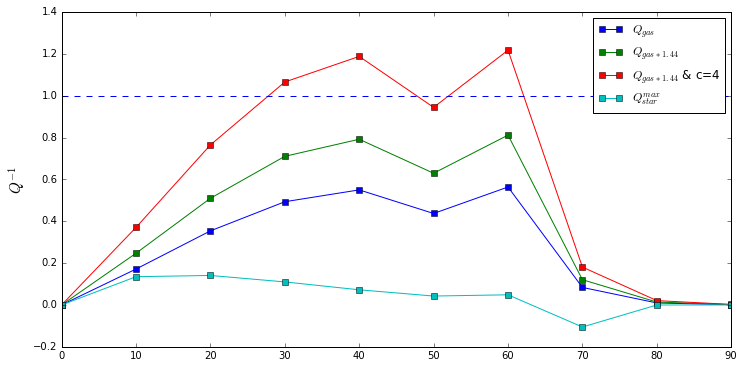

In [42]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)
#кроме первой точки, т.к. там деление на ноль
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]*1.44) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas*1.44}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]*1.44) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas*1.44}$ & c=4')
# plt.plot(map(lambda l: l/scale, r_q_n), q_n, 'o', label='noordermeer 1F')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        sig_R_approx(r_g_dens), 
                        [surfaceDensityStarR(M_to_L, h_disc, l_, mu0_c_I) for l_ in r_g_dens])], 's-', label='$Q_{star}^{max}$')
plt.axhline(y=1, ls='--')
plt.legend()
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Частично похоже на диплом, видимо ошибки в эпицикл.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

In [43]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:]: #только до 90" берем, дальне нет данных по дисперсии
#     print r, r*0.072, epicyclicFreq_real(gas_approx, r, scale), gd
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*1.44))
    Qss.append(Qs(epicycl=epicyclicFreq_real(gas_approx, r, scale), sigma=sig_R_approx(r), 
                  star_density=surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I)))
    print r, Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), 
    qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print qeff, 1./qeff[0]
    invQeff.append(qeff)

10.0 7.40705261999 4.04819282513 0.0419168750132 (22.77520007634767, 0.25840604017477276) 0.0439074079107
20.0 7.09161830065 1.96157319954 0.0473983620015 (20.558808847408507, 0.52307583937861635) 0.0486409503304
30.0 9.08672139275 1.40783805648 0.049482037143 (19.909623548244117, 0.72106311913886401) 0.0502269667519
40.0 13.8120798874 1.26283003876 0.0515514186576 (19.222031184301144, 0.799215945870139) 0.0520236384184
50.0 23.4974503308 1.58864564642 0.0592744638826 (16.741400109346284, 0.63441130513028421) 0.0597321606
60.0 20.6125636068 1.23208268486 0.0923047729615 (10.72246182793745, 0.82030264319423429) 0.093262164608
70.0 -9.49048591783 8.29123697231 -1.97532756044 (0.7189226153191586, -0.21998963968431359) 1.39097029178
80.0 -4629.39312738 72.1913345924 -0.0527914559006 (18.91256398844517, -0.013874421856583224) 0.0528749037207
90.0 -108354.792572 579.344060094 -0.021613054236 (46.25782324840285, -0.0017264855553393156) 0.0216179649144


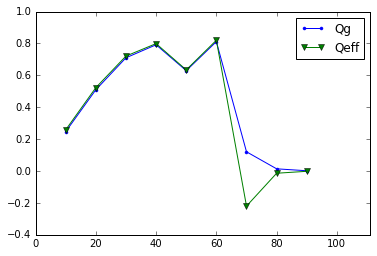

In [44]:
plt.plot(r_g_dens[1:], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:], zip(*invQeff)[1], 'v-', label='Qeff')
# plt.ylim(0., 2.1)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()

Опять что-то совсем не то.

In [45]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:]: #только до 90" берем, дальше нет данных по дисперсии
#     print r, r*0.072, epicyclicFreq_real(gas_approx, r, scale), gd
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*1.44))
    Qss.append(Qs(epicycl=epicyclicFreq_real(gas_approx, r, scale), sigma=sig_R_approx(r), 
                  star_density=surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I)))
    print r, Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), 
    qeff = findInvKinemQeffBrute(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print qeff, 1./qeff[0]
    invQeff.append(qeff)

10.0 7.40705261999 4.04819282513 0.0419168750132 (23.010000000000002, 0.25839368490068548) 0.0434593654933
20.0 7.09161830065 1.96157319954 0.0473983620015 (21.010000000000002, 0.52295878480756519) 0.0475963826749
30.0 9.08672139275 1.40783805648 0.049482037143 (20.010000000000002, 0.72105426956292729) 0.0499750124938
40.0 13.8120798874 1.26283003876 0.0515514186576 (19.010000000000002, 0.7991676806971354) 0.0526038926881
50.0 23.4974503308 1.58864564642 0.0592744638826 (17.010000000000002, 0.63433215376307184) 0.0587889476778
60.0 20.6125636068 1.23208268486 0.0923047729615 (11.01, 0.82002115443701473) 0.0908265213442
70.0 -9.49048591783 8.29123697231 -1.97532756044 WARNING! For Qs=-9.49048591783 Qg=8.29123697231 s=-1.97532756044 root of max near the max of k-range
(59999.010000000002, -5.5476194674502408e-06) 1.66669416712e-05
80.0 -4629.39312738 72.1913345924 -0.0527914559006 WARNING! For Qs=-4629.39312738 Qg=72.1913345924 s=-0.0527914559006 root of max near the max of k-range
(5999

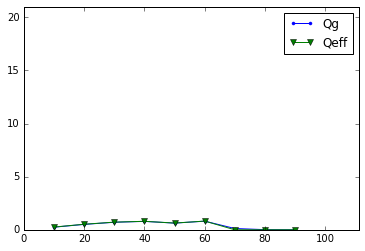

In [46]:
plt.plot(r_g_dens[1:], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:], zip(*invQeff)[1], 'v-', label='Qeff')
plt.ylim(0., 21)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()

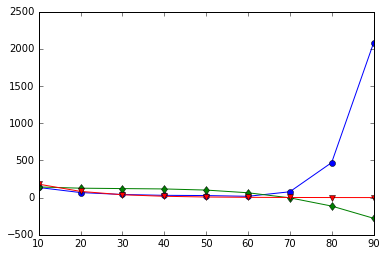

In [47]:
plt.plot(r_g_dens[1:], [epicyclicFreq_real(gas_approx, r, scale) for r in r_g_dens[1:]], 'o-')
plt.plot(r_g_dens[1:], [sig_R_approx(r) for r in r_g_dens[1:]], 'd-')
plt.plot(r_g_dens[1:], [surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I) for r in r_g_dens[1:]], 'v-')

TODO: почему такие странные провалы? (смотри ниже) Это не очень важно, но странно

In [48]:
# другая модель, оценка снизу
sig_R_approx = spl_min

In [49]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:]: #только до 90" берем, дальне нет данных по дисперсии
#     print r, r*0.072, epicyclicFreq_real(gas_approx, r, scale), gd
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*1.44))
    Qss.append(Qs(epicycl=epicyclicFreq_real(gas_approx, r, scale), sigma=sig_R_approx(r), 
                  star_density=surfaceDensityStarR(M_to_L, h_disc, r, mu0_c_I)))
    print r, Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), 
    qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print qeff, 1./qeff[0]
    invQeff.append(qeff)

10.0 5.98364478191 4.04819282513 0.0518881902593 (17.92555178867121, 0.26460825340395494) 0.0557862882989
20.0 5.72882724304 1.96157319954 0.0586736302441 (16.377992077318748, 0.53018728947058191) 0.0610575457162
30.0 7.34053284564 1.40783805648 0.0612529764417 (15.957002347900938, 0.72677118413641273) 0.0626684121615
40.0 11.1578226841 1.26283003876 0.0638146288006 (15.454196474133981, 0.80309478483653296) 0.064707343515
50.0 18.9819626339 1.58864564642 0.0733748557948 (13.47024855883703, 0.63701408253358971) 0.0742376798492
60.0 16.6514624636 1.23208268486 0.114262516463 (8.616462952069103, 0.82482836585302488) 0.116056902416
70.0 -7.66670623978 8.29123697231 -2.44522456047 (0.6951444191957105, -0.23552048469889122) 1.43854999391
80.0 -3739.76606502 72.1913345924 -0.0653496499196 (15.265669384712872, -0.013886154628111092) 0.0655064625598
90.0 -87532.3320127 579.344060094 -0.0267544341015 (37.36402514928314, -0.0017266949019540561) 0.026763711779


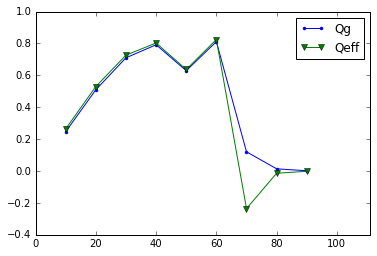

In [50]:
plt.plot(r_g_dens[1:], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:], zip(*invQeff)[1], 'v-', label='Qeff')
# plt.ylim(0., 2.1)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()